In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures

scale = True

In [19]:
data =  np.genfromtxt('C:\\Users\\Administrator\\python课程资料\\机器学习\\程序\\回归\\LR-testSet2.txt',delimiter=',')

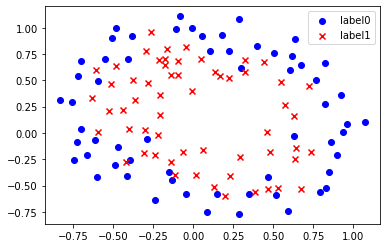

In [20]:
x_data = data[:,:-1] 
y_data = data[:,-1,np.newaxis]  

def plot():
    x0 = []
    y0 = []
    x1 = []
    y1 = []
    
    for i in range(len(x_data)):
        if y_data[i] == 0:
            x0.append(x_data[i,0])
            y0.append(x_data[i,1])
        else:
            x1.append(x_data[i,0])
            y1.append(x_data[i,1])
    scatter0 = plt.scatter(x0,y0,c='b',marker='o')
    scatter1 = plt.scatter(x1,y1,c='r',marker='x')
    
    plt.legend(handles=[scatter0,scatter1],labels=['label0','label1'],loc='best')

plot()
plt.show()

In [21]:
# 定义多项式回归,degree的值可以调节多项式的特征
poly_reg  = PolynomialFeatures(degree=3) 
# 特征处理
x_poly = poly_reg.fit_transform(x_data)

In [22]:
def sigmoid(x):
    return 1.0/(1+np.exp(-x))

def cost(xMat, yMat, ws):
    left = np.multiply(yMat, np.log(sigmoid(xMat*ws)))
    right = np.multiply(1 - yMat, np.log(1 - sigmoid(xMat*ws)))
    return np.sum(left + right) / -(len(xMat))

def gradAscent(xArr, yArr):
    
    if scale == True:
        xArr = preprocessing.scale(xArr)
    xMat = np.mat(xArr)
    yMat = np.mat(yArr)
    
    lr = 0.03
    epochs = 50000
    costList = []
    # 计算数据列数，有几列就有几个权值
    m,n = np.shape(xMat)
    # 初始化权值
    ws = np.mat(np.ones((n,1)))
    
    for i in range(epochs+1):             
        # xMat和weights矩阵相乘
        h = sigmoid(xMat*ws)   
        # 计算误差
        ws_grad = xMat.T*(h - yMat)/m
        ws = ws - lr*ws_grad 
        
        if i % 50 == 0:
            costList.append(cost(xMat,yMat,ws))
    return ws,costList

In [23]:
# 训练模型，得到权值和cost值的变化
ws,costList = gradAscent(x_poly, y_data)
print(ws)

[[ 1.        ]
 [ 1.2371065 ]
 [ 2.49808608]
 [-3.00063562]
 [-1.78391996]
 [-3.20793734]
 [ 0.22479076]
 [ 0.07953715]
 [ 0.39985707]
 [-0.45646967]]


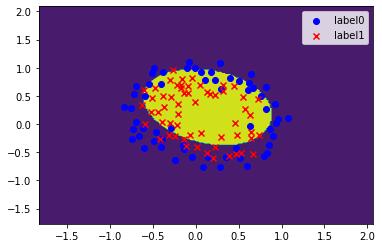

In [24]:
# 获取数据值所在的范围
# 计算下矩形框的大小
# 通过.min和.max生成xy的最小值最大值
x_min, x_max = x_data[:, 0].min() - 1, x_data[:, 0].max() + 1
y_min, y_max = x_data[:, 1].min() - 1, x_data[:, 1].max() + 1

# 生成网格矩阵
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# np.r_按row来组合array， 
# np.c_按colunm来组合array
# >>> a = np.array([1,2,3])
# >>> b = np.array([5,2,5])
# >>> np.r_[a,b]
# array([1, 2, 3, 5, 2, 5])
# >>> np.c_[a,b]
# array([[1, 5],
#        [2, 2],
#        [3, 5]])
# >>> np.c_[a,[0,0,0],b]
# array([[1, 0, 5],
#        [2, 0, 2],
#        [3, 0, 5]])

# ravel与flatten类似，多维数据转一维。flatten不会改变原始数据，ravel会改变原始数据
z = sigmoid(poly_reg.fit_transform(np.c_[xx.ravel(), yy.ravel()]).dot(np.array(ws)))
#z是预测值，当z＞0.5，我们把它变成1，当z＜0.5，我们把它变成0
for i in range(len(z)):
    if z[i] > 0.5:
        z[i] = 1
    else:
        z[i] = 0
z = z.reshape(xx.shape)

# 等高线图
# z值非0即1，画登高线的时候，只有2中高度，蓝色或黄色
cs = plt.contourf(xx, yy, z)
plot() 
plt.show()

In [25]:
# 预测
def predict(x_data, ws):
    if scale == True:
        x_data = preprocessing.scale(x_data)
    xMat = np.mat(x_data)
    ws = np.mat(ws)
    return [1 if x >= 0.5 else 0 for x in sigmoid(xMat*ws)]

predictions = predict(x_poly, ws)

print(classification_report(y_data, predictions))

              precision    recall  f1-score   support

         0.0       0.89      0.83      0.86        60
         1.0       0.84      0.90      0.87        58

    accuracy                           0.86       118
   macro avg       0.87      0.86      0.86       118
weighted avg       0.87      0.86      0.86       118



In [9]:
test = [[2,3]]
# 定义多项式回归,degree的值可以调节多项式的特征
poly_reg  = PolynomialFeatures(degree=3) 
# 特征处理
x_poly = poly_reg.fit_transform(test)

In [10]:
x_poly

array([[ 1.,  2.,  3.,  4.,  6.,  9.,  8., 12., 18., 27.]])

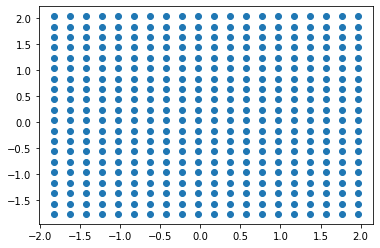

In [11]:
# 获取数据值所在的范围
x_min, x_max = x_data[:, 0].min() - 1, x_data[:, 0].max() + 1
y_min, y_max = x_data[:, 1].min() - 1, x_data[:, 1].max() + 1

# 生成网格矩阵
# 0.2时点和点之间的间隔
# 取值变小→越密集
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                     np.arange(y_min, y_max, 0.2))

plt.scatter(xx,yy)
plt.show()

### 训练逻辑
 - 将网格中的某一点投入训练，返回0或1
 - 根据0或1，给予一定的颜色
 - 画出等高线（边际线）

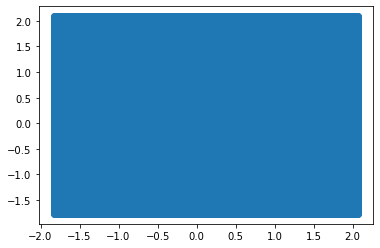

In [12]:
# 获取数据值所在的范围
x_min, x_max = x_data[:, 0].min() - 1, x_data[:, 0].max() + 1
y_min, y_max = x_data[:, 1].min() - 1, x_data[:, 1].max() + 1

# 生成网格矩阵
# 0.2时点和点之间的间隔
# 取值变小→越密集
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

plt.scatter(xx,yy)
plt.show()

In [13]:
[[1,1],[2,2]]  #2维的数据
[1,1,2,2]  #→扁平化之后成为1维的数据

[1, 1, 2, 2]

In [14]:
test = [[2,3]]
# 定义多项式回归,degree的值可以调节多项式的特征
poly_reg  = PolynomialFeatures(degree=3) 
# 特征处理
x_poly = poly_reg.fit_transform(test)
x_poly

array([[ 1.,  2.,  3.,  4.,  6.,  9.,  8., 12., 18., 27.]])